In [1]:
%run my_functions.ipynb

-1 1
-2 0
-3 1


In [2]:
#sat_formula = random_kcnf(n_literals=3,n_conjuncts=5,k=3)
sat_formula = [[-1,-2,-3], [1,2,3], [-1,2,-3], [1,2,-3], [-1,-2,-3]]
#sat_formula

3
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


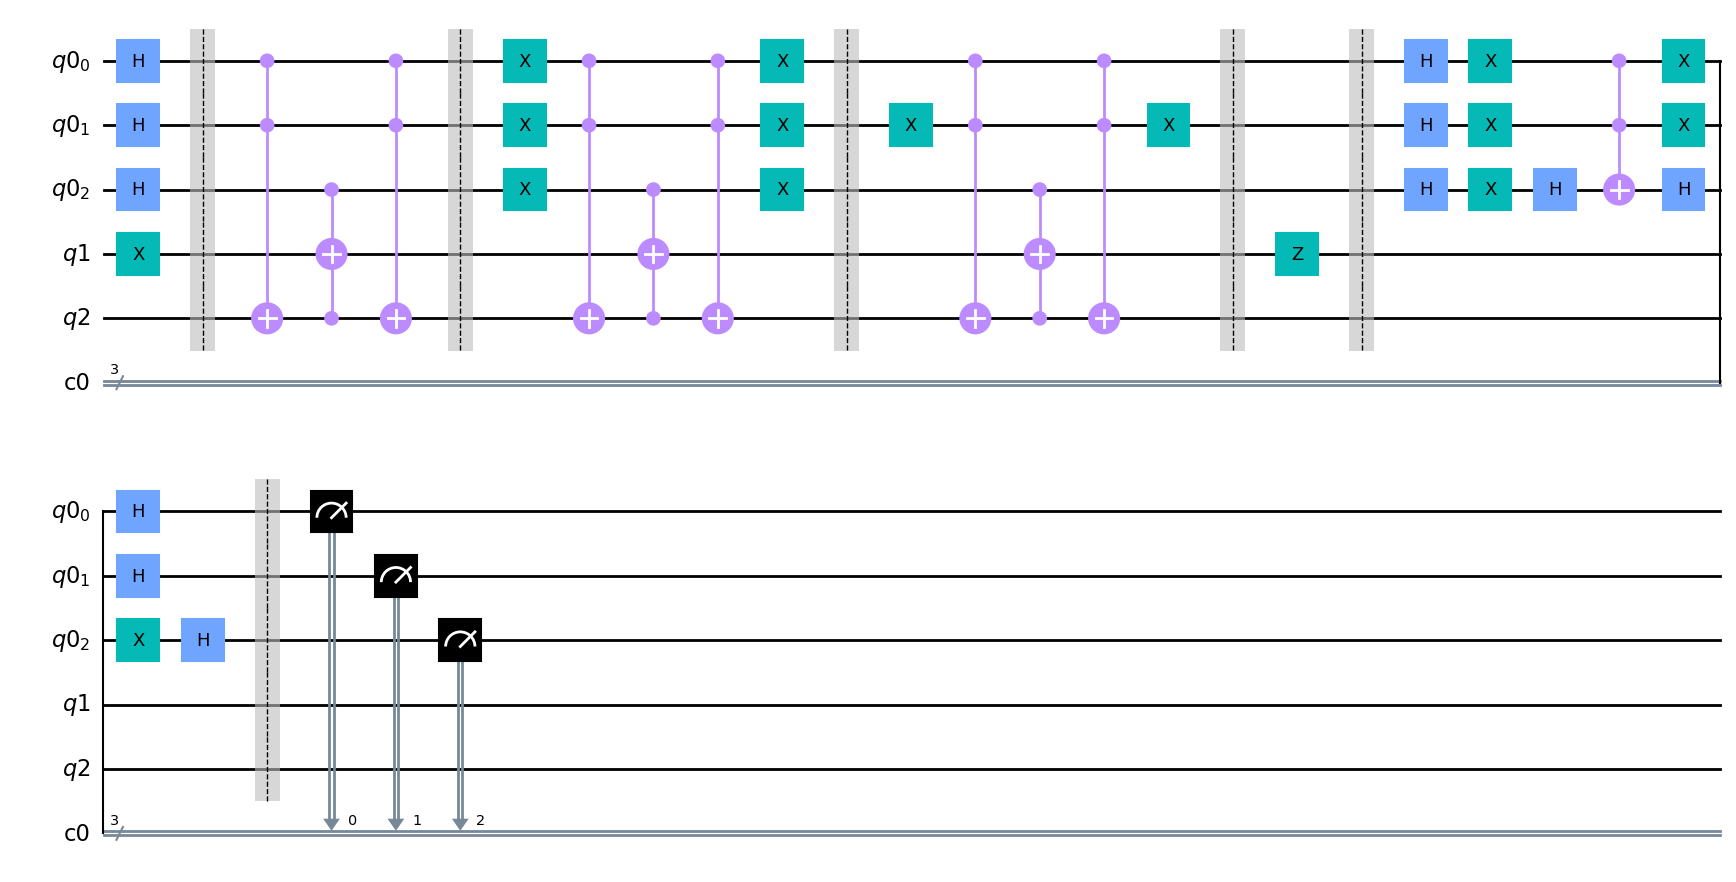

In [3]:
quant_part = [sat_formula[0]]+[sat_formula[1]] + [sat_formula[2]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [4]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
soln = []
all_soln = []
for key,value in counts.items():
    all_soln.append(key)
    if value>sum(counts.values())/len(counts):
        soln.append(key)

quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'111': 212, '011': 86, '100': 79, '000': 204, '010': 94, '101': 200, '110': 80, '001': 69}
Max values above average from the dictionary: ['111', '000', '101']


In [5]:
all_soln

['111', '011', '100', '000', '010', '101', '110', '001']

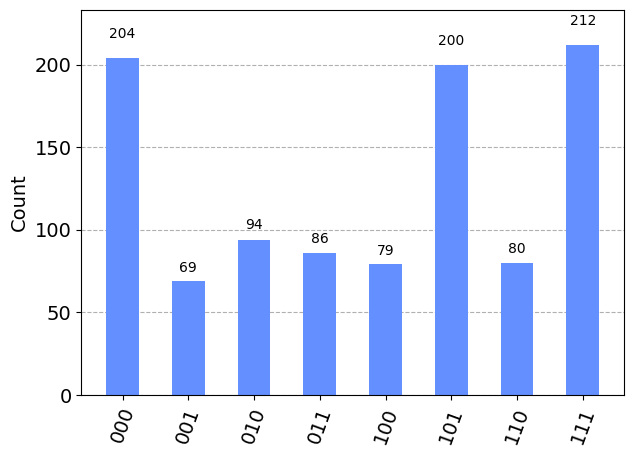

In [6]:
plot_histogram(counts)

In [7]:
# The above values corresponding to max counts are the false solutions. So, one work around is:
#Step 1: verify the above achieved solution using the classical_satchecker function to check if its the True or False solution
#Step 2: If True, continue to solve the rest of the problem
#Step 3: If False, then take the quantum solutions as [All outcomes - Outcomes corresponding to max values] and continue the problem.

In [8]:
#Verifying if the quantum solutions are TRUE solutions or FALSE solutions
classical_sat_checker(quant_part,quant_soln)

['No solution exists']

In [9]:
quant_soln = [x for x in all_soln if x not in quant_soln]
quant_soln


['011', '100', '010', '110', '001']

In [10]:
classical_sat_checker(quant_part,quant_soln)

['011', '100', '010', '110', '001']

In [11]:
classical_part = [sat_formula[3]]+[sat_formula[4]]
sat_solution = classical_sat_checker(classical_part,quant_soln)
sat_solution

['011', '100', '010', '110']

Find the complexity of the above algorithm. Check if its equivalent to classical sat solver? (I Assume NOT). Coz, I am using classical_sat_checker to check the solutions of quantum part
and also later for the classical part.

If one knows that the solutions for the given sat problem is a single or very few solutions possible in the search space, then one can be sure that the quantum part solutions are TRUE
solutions and thus can skip the step of verifying them by using classical_sat_checker. This case is thus automatically better than implementing the full classical solver.